<a href="https://colab.research.google.com/github/NSR-Ribeiro/aulaspython_vespertino/blob/main/Aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estudo de Gráfico com seaborn, Plotly gerando HTML para o Flask



1.  Alô Mundo
2.  Carregar o Dataset
3.  Criar os top_10
4.  Criar um gráfico no Seaborn
5.  Criar um gráfico interativo
6.  Salvar em html
7.  Criar uma aplicação flask com o Gráfico
8.  Uso de GPT
9.  Avaliações e Faltas









In [72]:
print("Hello Word!")

Hello Word!


In [73]:
import pandas as pd

In [74]:
# df = pd.read_csv('/content/imigrantes_canada.csv')

url = 'https://raw.githubusercontent.com/romulosilvestre/datasets-semanaestastitica/main/imigrantes_canada.csv'

df = pd.read_csv(url)

In [75]:
df.head()

,País,Continente,Região,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
2,Argélia,África,Norte da África,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


<Axes: xlabel='País', ylabel='Total'>

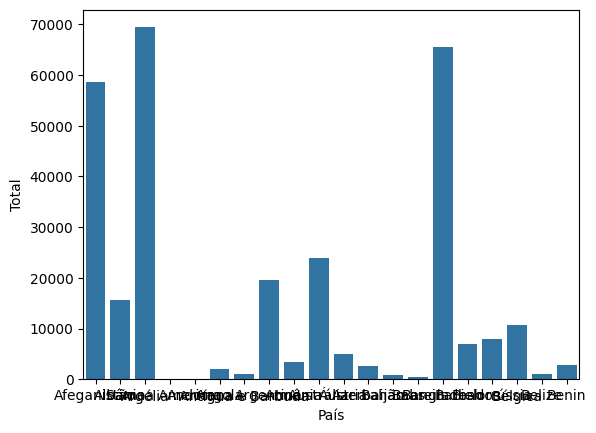

In [76]:
import seaborn as sns

sns.barplot(x="País",y="Total", data= df.head(20))

In [77]:
df.set_index('País',inplace = True)

In [78]:
df.head(10)

,Continente,Região,1980,1981,1982,1983,1984,1985,1986,1987,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
País,,,,,,,,,,,,,,,,,,,,,
Afeganistão,Ásia,Sul da Ásia,16,39,39,47,71,340,496,741,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albânia,Europa,Sul da Europa,1,0,0,0,0,0,1,2,...,1223,856,702,560,716,561,539,620,603,15699
Argélia,África,Norte da África,80,67,71,69,63,44,69,132,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
Samoa Americana,Oceânia,Polinésia,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europa,Sul da Europa,0,0,0,0,0,0,2,0,...,0,1,1,0,0,0,0,1,1,15
Angola,África,África média,1,3,6,6,4,3,5,5,...,295,184,106,76,62,61,39,70,45,2113
Antígua e Barbuda,América Latina e o Caribe,Caribe,0,0,0,0,42,52,51,61,...,24,32,15,32,38,27,37,51,25,981
Argentina,América Latina e o Caribe,América do Sul,368,426,626,241,237,196,213,519,...,1153,847,620,540,467,459,278,263,282,19596
Armênia,Ásia,Ásia Ocidental,0,0,0,0,0,0,0,0,...,224,218,198,205,267,252,236,258,207,3310


In [79]:
top_10 = df.sort_values(by='Total',ascending=False).head(10)

[Text(0.5, 1.0, 'Os dez países com mais imigrantes para o Canadá'),
 Text(0.5, 0, 'Total de Imigrantes'),
 Text(0, 0.5, '')]

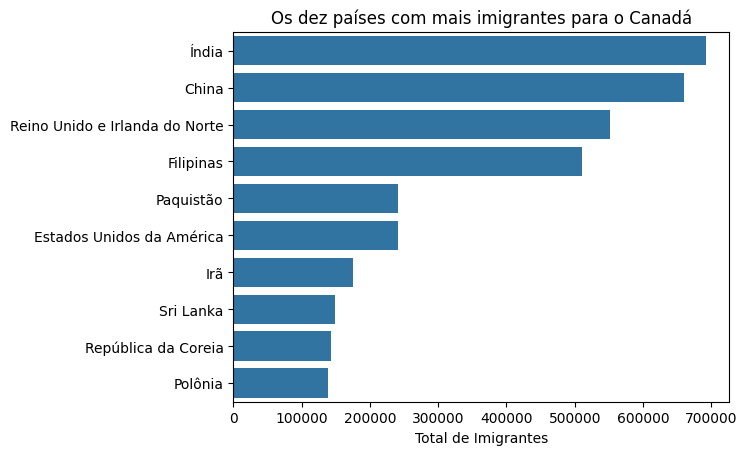

In [80]:
ax = sns.barplot(data=top_10,y=top_10.index,x='Total',orient='h')
ax.set(
    title='Os dez países com mais imigrantes para o Canadá',
    xlabel='Total de Imigrantes',
    ylabel=''
)

In [81]:
import matplotlib.pyplot as plt

In [82]:
def gerar_grafico_paleta(pallete):
  fig,ax = plt.subplots(figsize=(8,4))
  ax = sns.barplot(data=top_10,y=top_10.index,x='Total',
                 orient='h',
                 palette=pallete)
  ax.set_title('Os dez países com mais imigrantes para o Canadá',
             loc='left',
             fontsize=16)
  ax.set_xlabel('Total de Imigrantes',fontsize=14)
  ax.set_ylabel('')
  plt.show()

<ipython-input-82-41e83a06c1bb>:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




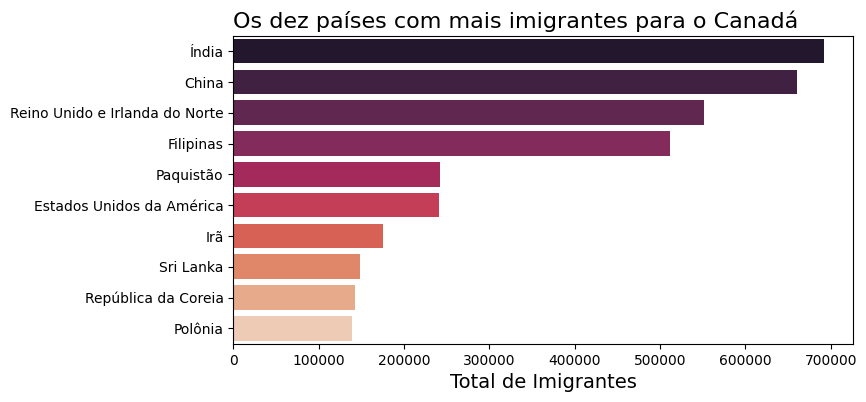

In [83]:
gerar_grafico_paleta('rocket')



In [84]:
## Gráfico Interativo com Plotly

In [85]:
import plotly.express as px

In [86]:
anos =list(map(str,range(1980,2014)))

In [87]:
brasil = df.loc['Brasil', anos]

In [88]:
brasil_dict = {'ano': brasil.index.tolist(),'imigrantes':brasil.values.tolist()}


In [89]:
dados_brasil = pd.DataFrame(brasil_dict)

In [90]:
dados_brasil.head()

,ano,imigrantes
0,1980,211
1,1981,220
2,1982,192
3,1983,139
4,1984,145


In [91]:
fig = px.line(dados_brasil,
              x='ano',
              y='imigrantes',
              title='Imigrantes do Brasil para o Canada \n de 1980 a 2013')
fig.update_layout(title_x=0.5)
fig.update_layout(width=1000,
                  height=500,
                  xaxis={'tickangle':45})
fig.update_traces(line_color='#9751FC',line_width=6)
#fig.update_xaxes(tickangle=45)
fig.show()

In [92]:
# Salvando Gráficos

fig.write_html('imigrantes_brasil.html')